In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import mechanics

In [26]:
platform = mechanics.Platform()

In [27]:
platform.vertices

array([[ 3.        ,  0.        ,  0.        ],
       [-1.5       ,  2.59807621,  0.        ],
       [-1.5       , -2.59807621,  0.        ]])

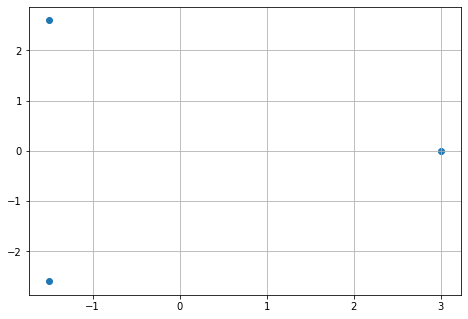

In [30]:
platform.plot()

Three-point thetering. Label each point with subscript 1, 2, or 3. Make a coordinate system where z=0 is a certain height above the ground (s.t. the platform is close to z=0) and the xy-plane is parallel to the ground.

In [20]:
# Fixed parameters
PLATFORM_WIDTH = 5  # m, width of platform (= the shortest dimensions)
PLATFORM_LENGTH = 7  # m
THETA_MAX = 5  # deg, pointing accuracy

# Suppose they are all seperated in azimuth by 120 deg
x2, y2 = 0, PLATFORM_WIDTH/2  # define the y-axis to go through this point (phi = 90)
# Point 1 is at phi = -30
x1 = PLATFORM_LENGTH/2
y1 = -x1/np.sqrt(3)  # tan(-30)
# Point 3 is point 1 mirrored
x3 = -x1
y3 = y1

In [21]:
# calculate z-component of normal vector
nz = (x2-x1)*(y3-y1) - (y2-y1)*(x3-x1)

# n dot (0,0,1) = ||n|| * cos(theta) where theta is the angle the normal vector makes with the vertical
# --> the z-component nz is equal to ||n|| cos theta
# --> cos(theta) = nz/||n||
# theta <= theta_max --> cos(theta) >= cos(theta_max) since cos is a decreasing function in the first quadrant
# nz/n = cos(theta) >= cos(theta_max) --> n <= nz/cos(theta_max) := nmax

N_MAX = nz/np.cos(THETA_MAX * np.pi/180)

In [23]:
def normal_vector(z1, z2, z3):
    """
    Calculate normal vector given values of the z-components. The others are known.
    """
    v1 = (x2-x1, y2-y1, z2-z1)
    v2 = (x3-x1, y3-y1, z3-z1)
    n = np.cross(v1, v2)
    return n

def normal_length(z1, z2, z3):
    n = normal_vector(z1, z2, z3)
    nx, ny, nz = n
    return np.sqrt(nx**2 + ny**2 + nz**2)

In [22]:
print(N_MAX)

31.76596066588526


In [17]:
normal_length(0, 1, 0)

32.4100476575311

$$P_i = (x_i, y_i, z_i) \\
v_1 = P_2 - P_1 \\
v_2 = P_3 - P_1 \\
n = v_1 \times v_2 \\
||n|| = ||v_1||||v_2||\sin{\phi}; \phi = \angle(v_1, v_2) \\
\cos{\phi} = \frac{1}{||v_1||||v_2||}v_1 \cdot v_2; \sin{\phi} = \sqrt{1-\cos^2{\phi}} \\
||n|| = \sqrt{||v_1||^2||v_2||^2 - (v_1\cdot v_2)^2} \\
||n||^2 = ((x_2-x_1)^2+(y_2-y_1)^2+(z_2-z_1)^2)((x_3-x_1)^2+(y_3-y_1)^2+(z_3-z_1)^2) - (((x_2-x_1)(x_3-x_1)+(y_2-y_1)(y_3-y_1) + (z_2-z_1)(z_3-z_1)))^2
$$

$$
||n||^2 = (x_2-x_1)^2(y_3-y_1)^2+(x_2-x_1)^2(z_3-z_1)^2+(y_2-y_1)^2(x_3-x_1)^2+(y_2-y_1)^2(z_3-z_1)^2+(z_2-z_1)^2(x_3-x_1)^2+(z_2-z_1)^2(y_3-y_1)^2 - 2((x_2-x_1)(x_3-x_1)(y_2-y_1)(y_3-y_1)+(x_2-x_1)(x_3-x_1)(z_2-z_1)(z_3-z_1)+(y_2-y_1)(y_3-y_1)(z_2-z_1)(z_3-z_1))
$$